In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "last"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('float_format', lambda x: '%.2f' % x)

#显示中文
plt.rcParams['font.sans-serif']='simhei'
plt.rcParams['axes.unicode_minus']=False

# 宏观市场-竞争分析

## 宏观市场潜力分析

In [2]:
wxy=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\驱虫剂市场\蚊香液市场近三年交易额.xlsx")
tz=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\驱虫剂市场\电蚊香套装市场近三年交易额.xlsx")
fmfz=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\驱虫剂市场\防霉防蛀片市场近三年交易额.xlsx")
ms=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\驱虫剂市场\灭鼠杀虫剂市场近三年交易额.xlsx")
wx=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\驱虫剂市场\盘香灭蟑香蚊香盘市场近三年交易额.xlsx")
jrq=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\驱虫剂市场\蚊香加热器市场近三年交易额.xlsx")
wxp=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\驱虫剂市场\蚊香片市场近三年交易额.xlsx")

In [3]:
d=pd.merge(wxy,tz,on="时间",how="inner") 

for i in [fmfz,ms,wx,jrq,wxp]:        # 用循环语句将多个表依次连接
    d=pd.merge(d,i,on="时间",how="inner")

d.head()

d.columns=["时间","蚊香液","电蚊香套装","防霉防蛀片","灭鼠杀虫剂","蚊香","蚊香加热器","蚊香片"]

d.head()

,时间,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片
0,2018-10-01,7814546.15,106531.29,8541153.59,113654778.06,4171283.35,315639.48,1032414.29
1,2018-09-01,10654973.47,105666.63,8825870.43,144026060.60,6784500.17,457366.41,1566651.88
2,2018-08-01,17835577.80,201467.03,6320153.44,154042579.93,10709683.41,746513.13,2617149.00
3,2018-07-01,38877917.83,438635.29,6302595.06,148003236.35,16589184.89,1871757.00,6209040.06
4,2018-06-01,76499091.86,953749.78,7047206.98,135943823.74,23526385.73,3641025.92,12484919.63


In [4]:
d.head()

,时间,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片
0,2018-10-01,7814546.15,106531.29,8541153.59,113654778.06,4171283.35,315639.48,1032414.29
1,2018-09-01,10654973.47,105666.63,8825870.43,144026060.60,6784500.17,457366.41,1566651.88
2,2018-08-01,17835577.80,201467.03,6320153.44,154042579.93,10709683.41,746513.13,2617149.00
3,2018-07-01,38877917.83,438635.29,6302595.06,148003236.35,16589184.89,1871757.00,6209040.06
4,2018-06-01,76499091.86,953749.78,7047206.98,135943823.74,23526385.73,3641025.92,12484919.63


## 一级市场的容量分析

把datetime格式的字段设置为该表的索引，可以方便后续对表进行按时间维度分析：

In [5]:
d=d.set_index("时间")

In [6]:
d.head()

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片
时间,,,,,,,
2018-10-01,7814546.15,106531.29,8541153.59,113654778.06,4171283.35,315639.48,1032414.29
2018-09-01,10654973.47,105666.63,8825870.43,144026060.60,6784500.17,457366.41,1566651.88
2018-08-01,17835577.80,201467.03,6320153.44,154042579.93,10709683.41,746513.13,2617149.00
2018-07-01,38877917.83,438635.29,6302595.06,148003236.35,16589184.89,1871757.00,6209040.06
2018-06-01,76499091.86,953749.78,7047206.98,135943823.74,23526385.73,3641025.92,12484919.63


In [7]:
d["一级市场销售额"]=d.sum(axis=1)
d.head()

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2018-10-01,7814546.15,106531.29,8541153.59,113654778.06,4171283.35,315639.48,1032414.29,135636346.21
2018-09-01,10654973.47,105666.63,8825870.43,144026060.60,6784500.17,457366.41,1566651.88,172421089.59
2018-08-01,17835577.80,201467.03,6320153.44,154042579.93,10709683.41,746513.13,2617149.00,192473123.74
2018-07-01,38877917.83,438635.29,6302595.06,148003236.35,16589184.89,1871757.00,6209040.06,218292366.48
2018-06-01,76499091.86,953749.78,7047206.98,135943823.74,23526385.73,3641025.92,12484919.63,260096203.64


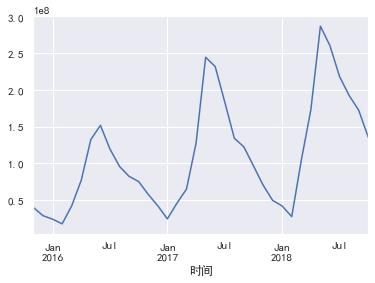

In [8]:
d.一级市场销售额.plot()

- 整个一级市场在近两年来，市场总体容量是增加的
- 每年夏天是这一年一级市场交易额的高峰期，有明显的季节性波动
- 整个一级市场的容量增速有所放缓

通过折线图发现，如果作年度市场容量分析，缺少了2018年11月和12月的数据，可以用线性回归做简单的填补：

预测2018年11月的销售额：
- 抽取2015年到2017年11月的数据
- 利用抽取的数据，对每个二级市场单独建立线性回归模型，得到每个二级市场的2018年11月的销售额预测结果

In [9]:
d.head()

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2018-10-01,7814546.15,106531.29,8541153.59,113654778.06,4171283.35,315639.48,1032414.29,135636346.21
2018-09-01,10654973.47,105666.63,8825870.43,144026060.60,6784500.17,457366.41,1566651.88,172421089.59
2018-08-01,17835577.80,201467.03,6320153.44,154042579.93,10709683.41,746513.13,2617149.00,192473123.74
2018-07-01,38877917.83,438635.29,6302595.06,148003236.35,16589184.89,1871757.00,6209040.06,218292366.48
2018-06-01,76499091.86,953749.78,7047206.98,135943823.74,23526385.73,3641025.92,12484919.63,260096203.64


In [10]:
d_11=pd.concat([d["2015-11"],d["2016-11"],d["2017-11"]],axis=0)
d_11

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2015-11-01,1579795.72,185094.22,3364112.14,33038726.31,1197791.27,86889.91,325744.43,39778154.00
2016-11-01,2758827.44,106291.23,4975519.21,47806248.76,1473418.20,82835.82,512990.23,57716130.89
2017-11-01,4257593.87,94993.76,5447184.43,58382172.96,1581530.20,168141.79,617094.94,70548711.95


对上表每个二级市场在2018-11月的销售额做预测：

In [11]:
from sklearn import linear_model    # 想清楚x和y数据集分别是什么

y_11=[]      # 该空列表用来存储预测结果

x_train=np.array([2015,2016,2017]).reshape(-1,1)      # 记得转数组

for i in d.columns:    # 每次抽取一列的字段名
    y_train=d_11[i].values   # 记得转数组
    lr=linear_model.LinearRegression().fit(x_train,y_train)   # 建立模型，训练模型
    y_pre=lr.predict(np.array([[2018]]))   
    y_11.append(y_pre[0])  # y_pre是数组，要把预测值从数组中抽取

In [12]:
y_11

[5543203.826666832,
 38692.609999999404,
 6678677.549999952,
 71752495.99333572,
 1801318.8199999928,
 193874.38666665554,
 776627.0433334112,
 86784890.22999954]

要想把上面的y_11作为2018-11的销售预测结果合并到d_11表中去，就要先生成时间格式的数值，因为d_11索引就是datetime类型。

In [13]:
ss=pd.Series(y_11,
          index=d_11.columns,
          name=pd.to_datetime("2018-11-01"))

ss 

蚊香液        5543203.83
电蚊香套装        38692.61
防霉防蛀片      6678677.55
灭鼠杀虫剂     71752495.99
蚊香         1801318.82
蚊香加热器       193874.39
蚊香片         776627.04
一级市场销售额   86784890.23
Name: 2018-11-01 00:00:00, dtype: float64

把上面的Series返回d_11的最后一行：

In [14]:
d_11=d_11.append(ss)

d_11

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2015-11-01,1579795.72,185094.22,3364112.14,33038726.31,1197791.27,86889.91,325744.43,39778154.00
2016-11-01,2758827.44,106291.23,4975519.21,47806248.76,1473418.20,82835.82,512990.23,57716130.89
2017-11-01,4257593.87,94993.76,5447184.43,58382172.96,1581530.20,168141.79,617094.94,70548711.95
2018-11-01,5543203.83,38692.61,6678677.55,71752495.99,1801318.82,193874.39,776627.04,86784890.23


同理，对二级市场12月的数据进行相同方式预测：

In [15]:
d_12=pd.concat([d["2015-12"],d["2016-12"],d["2017-12"]],axis=0)
d_12

# 
from sklearn import linear_model    # 想清楚x和y数据集分别是什么

y_12=[]      # 该空列表用来存储预测结果

x_train=np.array([2015,2016,2017]).reshape(-1,1)      # 记得转数组

for i in d.columns:    # 每次抽取一列的字段名
    y_train=d_12[i].values   # 记得转数组
    lr=linear_model.LinearRegression().fit(x_train,y_train)   # 建立模型，训练模型
    y_pre=lr.predict(np.array([[2018]]))   
    y_12.append(y_pre[0])  # y_pre是数组，要把预测值从数组中抽取


#
ss=pd.Series(y_12,
          index=d_12.columns,
          name=pd.to_datetime("2018-12-01"))


d_12=d_12.append(ss)

d_12

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2015-12-01,583284.49,110068.83,2333602.08,24727556.28,818479.56,34076.91,134890.48,28741958.63
2016-12-01,1558633.63,84350.57,3504367.98,35466680.56,1234900.05,52118.96,293737.20,42194788.95
2017-12-01,2213102.83,71600.17,3259747.23,42922831.01,796930.46,69145.59,314120.38,49647477.67
2018-12-01,3081491.99,50204.53,3958717.58,52567630.68,928554.26,86849.17,426812.59,61100260.79


把d,d_11,d_12纵向合并到一起，然后去重、排序：

In [16]:
data_all=pd.concat([d,d_11,d_12],axis=0).drop_duplicates().sort_index(ascending=False).iloc[:-2,:]
data_all.head()

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2018-12-01,3081491.99,50204.53,3958717.58,52567630.68,928554.26,86849.17,426812.59,61100260.79
2018-11-01,5543203.83,38692.61,6678677.55,71752495.99,1801318.82,193874.39,776627.04,86784890.23
2018-10-01,7814546.15,106531.29,8541153.59,113654778.06,4171283.35,315639.48,1032414.29,135636346.21
2018-09-01,10654973.47,105666.63,8825870.43,144026060.60,6784500.17,457366.41,1566651.88,172421089.59
2018-08-01,17835577.80,201467.03,6320153.44,154042579.93,10709683.41,746513.13,2617149.00,192473123.74


接下来作年度市场容量分析：
- 只要DataFrame的索引是datetime数据类型的，该DataFrame就可以调用resample进行重采样
- 可以把df.resample()方法看作是专门给时间用的"df.groupby()"
- df.resample()方法与df.groupby()生成的对象的数据结构是一样

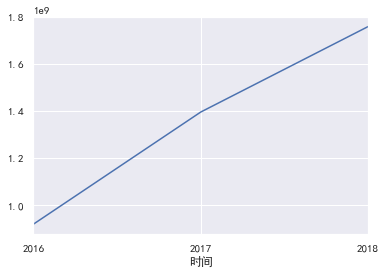

In [17]:
data_all.resample("Y")["一级市场销售额"].sum().plot()

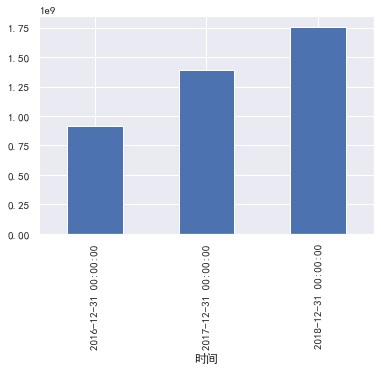

In [18]:
data_all.resample("Y")["一级市场销售额"].sum().plot(kind="bar")

与2016-2017年销售额增速相比，2017-2018年有所下滑。

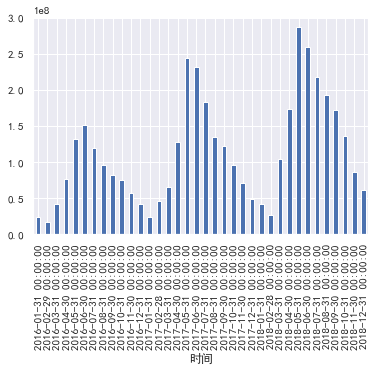

In [19]:
data_all.resample("M")["一级市场销售额"].sum().plot(kind="bar")

## 二级市场容量分析

In [20]:
data_all.head()

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2018-12-01,3081491.99,50204.53,3958717.58,52567630.68,928554.26,86849.17,426812.59,61100260.79
2018-11-01,5543203.83,38692.61,6678677.55,71752495.99,1801318.82,193874.39,776627.04,86784890.23
2018-10-01,7814546.15,106531.29,8541153.59,113654778.06,4171283.35,315639.48,1032414.29,135636346.21
2018-09-01,10654973.47,105666.63,8825870.43,144026060.60,6784500.17,457366.41,1566651.88,172421089.59
2018-08-01,17835577.80,201467.03,6320153.44,154042579.93,10709683.41,746513.13,2617149.00,192473123.74


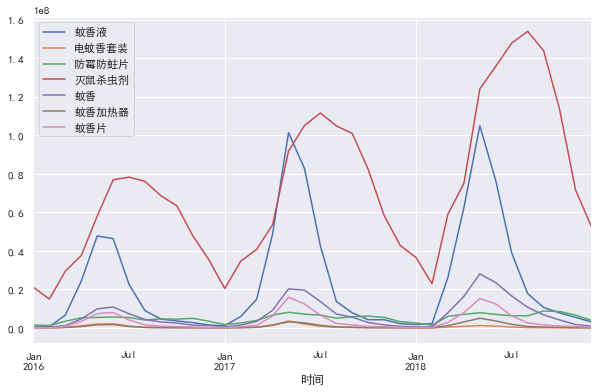

In [21]:
data_all.iloc[:,:-1].plot(figsize=(10,6))

- 虽然一级市场销售额在2017-2018年增速放缓
- 但是拜耳主营业务产品所处的二级市场（灭鼠杀虫剂）增速放缓不明显，且容量出于扩展状态

## 二级市场占比分析

分析拜耳所处的一级市场中，各二级市场占整个一级市场比例的变化趋势：

In [22]:
data_05=data_all.resample("Y").sum()
data_05

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2016-12-31,170490530.58,7666572.12,50023001.94,608047076.97,47852853.90,5905204.71,27980839.47,917966079.69
2017-12-31,330065560.60,9377531.68,62678822.18,847773992.52,86355393.31,10552841.02,49068587.96,1395872729.27
2018-12-31,358207713.14,4537682.09,72701365.23,1137893384.86,118088509.52,16836723.42,51845921.56,1760111299.82


In [23]:
a=[]

for i in data_05.columns[:-1]:
    a.append(data_05[i]/data_05.iloc[:,-1])

In [24]:
b=pd.DataFrame(a).T
b.columns=data_05.columns[:-1]
b 

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片
时间,,,,,,,
2016-12-31,0.19,0.01,0.05,0.66,0.05,0.01,0.03
2017-12-31,0.24,0.01,0.04,0.61,0.06,0.01,0.04
2018-12-31,0.20,0.00,0.04,0.65,0.07,0.01,0.03


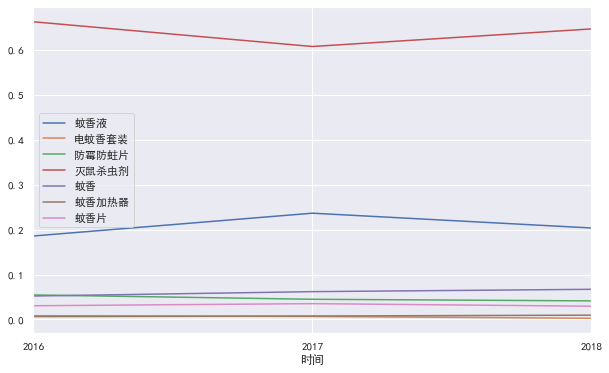

In [25]:
b.plot(figsize=(10,6))

- 拜耳主营业务产品所处的二级市场——灭鼠杀虫剂，在过去三年多，占整个一级市场的份额保持在60%以上。
- 拜耳主营业务包括灭蟑和杀虫灭蚁，该类产品所处的二级市场“灭鼠杀虫市场”没有出现明显的萎缩。

## 二级市场增量分析

In [26]:
data_05

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
时间,,,,,,,,
2016-12-31,170490530.58,7666572.12,50023001.94,608047076.97,47852853.90,5905204.71,27980839.47,917966079.69
2017-12-31,330065560.60,9377531.68,62678822.18,847773992.52,86355393.31,10552841.02,49068587.96,1395872729.27
2018-12-31,358207713.14,4537682.09,72701365.23,1137893384.86,118088509.52,16836723.42,51845921.56,1760111299.82


2016年-2017年各二级市场增速：

In [27]:
incre_16=(data_05.iloc[1,:]-data_05.iloc[0,:])/data_05.iloc[0,:]

incre_17=(data_05.iloc[2,:]-data_05.iloc[1,:])/data_05.iloc[1,:]

dd=pd.DataFrame([incre_16,incre_17])
dd.index=["2016-2017","2017-2018"]
dd 

,蚊香液,电蚊香套装,防霉防蛀片,灭鼠杀虫剂,蚊香,蚊香加热器,蚊香片,一级市场销售额
2016-2017,0.94,0.22,0.25,0.39,0.80,0.79,0.75,0.52
2017-2018,0.09,-0.52,0.16,0.34,0.37,0.60,0.06,0.26


In [28]:
dd.iloc[:,:-1].T

,2016-2017,2017-2018
蚊香液,0.94,0.09
电蚊香套装,0.22,-0.52
防霉防蛀片,0.25,0.16
灭鼠杀虫剂,0.39,0.34
蚊香,0.80,0.37
蚊香加热器,0.79,0.60
蚊香片,0.75,0.06


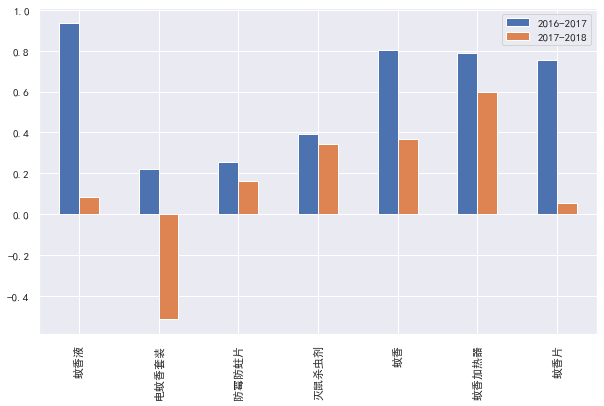

In [29]:
dd.iloc[:,:-1].T.plot(kind="bar",figsize=(10,6)) 

- 一级市场总体增长幅度是下跌的
- 细分成二级市场，每个二级市场销售额增长幅度均有所下跌
- 但是，拜耳主营业务产品所处的“灭鼠杀虫剂”二级市场增长幅度下跌不大

## 宏观市场竞争分析

In [30]:
band=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\top100品牌数据.xlsx")
band.head()

,品牌,行业排名,交易指数,交易增长幅度,支付转化指数,操作
0,PREMISE/拜灭士,1,530344,-0.32,1521,趋势分析
1,科凌虫控,2,474937,-0.19,1581,趋势分析
2,ARS/安速,3,402372,-0.27,1448,趋势分析
3,思乐智,4,360780,0.21,841,趋势分析
4,希诺,5,346656,-0.11,1865,趋势分析


In [31]:
band.sort_values("交易指数",ascending=False)

,品牌,行业排名,交易指数,交易增长幅度,支付转化指数,操作
0,PREMISE/拜灭士,1,530344,-0.32,1521,趋势分析
1,科凌虫控,2,474937,-0.19,1581,趋势分析
2,ARS/安速,3,402372,-0.27,1448,趋势分析
3,思乐智,4,360780,0.21,841,趋势分析
4,希诺,5,346656,-0.11,1865,趋势分析
...,...,...,...,...,...,...
95,BK/帮科,96,67812,-0.50,1134,趋势分析
96,博尔康,97,66180,-0.26,792,趋势分析
97,无比滴,98,65779,-0.63,959,趋势分析
98,厚生,99,65520,-0.47,1600,趋势分析


查看拜耳的交易指数在前100个品牌中，交易指数占比如何？

In [32]:
band=band[["品牌","交易指数"]].set_index("品牌")
band 

,交易指数
品牌,
PREMISE/拜灭士,530344
科凌虫控,474937
ARS/安速,402372
思乐智,360780
希诺,346656
...,...
BK/帮科,67812
博尔康,66180
无比滴,65779


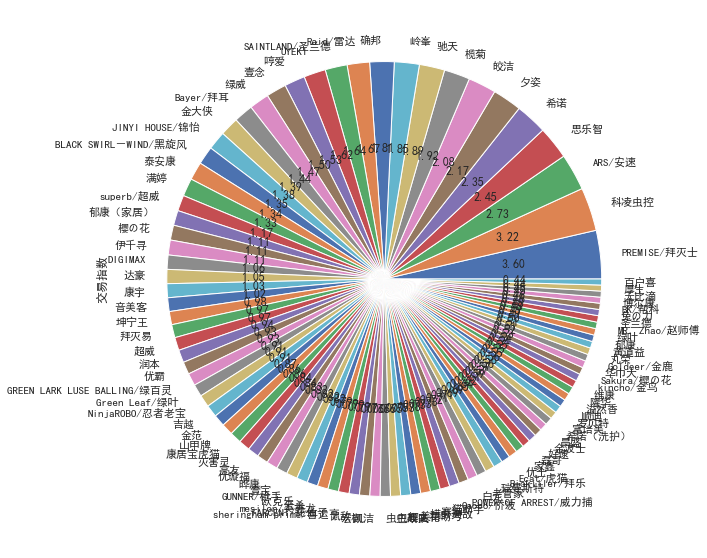

In [33]:
band["交易指数"].plot(kind="pie",figsize=(10,10),autopct="%.2f")

单独抽取前10品牌查看：

In [34]:
band["交易指数"][:10]

品牌
PREMISE/拜灭士    530344
科凌虫控           474937
ARS/安速         402372
思乐智            360780
希诺             346656
夕姿             319545
皎洁             306651
榄菊             282658
驰天             277965
岭峯             273049
Name: 交易指数, dtype: int64

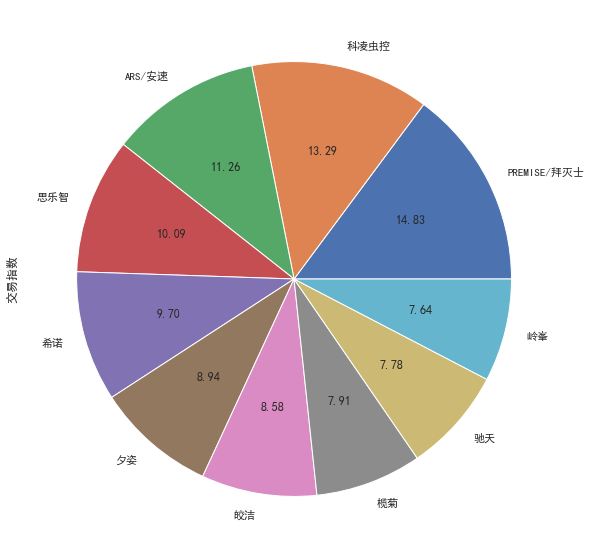

In [35]:
band["交易指数"][:10].plot(kind="pie",figsize=(10,10),autopct="%.2f")

- 无论对比排名前100名的品牌交易额占比，还是前10名的品牌交易额占比，拜耳的交易额占比并没有非常明显的差异
- 整个宏观市场（一级市场）竞争激烈程度非常高

# 微观市场-竞争分析

## 微观市场潜力分析

### 三级市场容量分析

In [36]:
ms=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\灭鼠杀虫剂细分市场\灭鼠.xlsx")
sc=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\灭鼠杀虫剂细分市场\杀虫.xlsx")
sz=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\灭鼠杀虫剂细分市场\虱子.xlsx")
zl=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\灭鼠杀虫剂细分市场\蟑螂.xlsx")
mc=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\灭鼠杀虫剂细分市场\螨.xlsx")

In [37]:
d_01=ms[["类别","预估销售额"]]
d_02=sc[["类别","预估销售额"]]
d_03=sz[["类别","预估销售额"]]
d_04=zl[["类别","预估销售额"]]
d_05=mc[["类别","预估销售额"]]

In [38]:
d_02

,类别,预估销售额
0,杀虫,2960.10
1,杀虫,59.40
2,杀虫,9702.00
3,杀虫,683.10
4,杀虫,1861.20
...,...,...
1995,杀虫,11628.00
1996,杀虫,1020.00
1997,杀虫,2009.90
1998,杀虫,1919.00


In [39]:
table=pd.concat([d_01,d_02,d_03,d_04,d_05],axis=0).dropna()
table.head()

,类别,预估销售额
0,灭鼠,267356.80
1,灭鼠,267356.80
2,灭鼠,98455.50
3,灭鼠,2960.10
4,灭鼠,3950.10


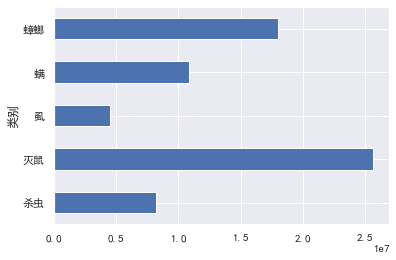

In [40]:
table.groupby("类别")["预估销售额"].sum().plot(kind="barh")

- 拜耳所处的主营产品在“灭蟑”和“杀虫”这三级市场中，市场容量较大。
- 市场容量最大的三级市场“灭鼠”，拜耳没有进入。

### 三级市场占比分析

在二级市场类目之下，各三级市场的预估销售额：

In [41]:
table.groupby("类别")["预估销售额"].sum()

类别
杀虫    8207628.10
灭鼠   25686011.99
虱     4512886.01
螨    10886752.88
蟑螂   18037223.68
Name: 预估销售额, dtype: float64

In [42]:
table["预估销售额"].sum()

67330502.66

In [43]:
(table.groupby("类别")["预估销售额"].sum())/(table["预估销售额"].sum())

类别
杀虫   0.12
灭鼠   0.38
虱    0.07
螨    0.16
蟑螂   0.27
Name: 预估销售额, dtype: float64

In [44]:
(table.groupby("类别")["预估销售额"].sum())/(table["预估销售额"].sum()).sum()

类别
杀虫   0.12
灭鼠   0.38
虱    0.07
螨    0.16
蟑螂   0.27
Name: 预估销售额, dtype: float64

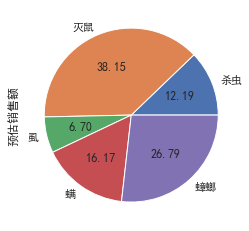

In [45]:
((table.groupby("类别")["预估销售额"].sum())/(table["预估销售额"].sum())).plot(kind="pie",autopct="%.2f")

- 拜耳主营业务产品所处的三级市场容量占整个二级市场进40%
- 灭鼠产品在二级市场中占比最高，拜耳并没进入
- 拜耳想做一款灭鼠产品，首先作为引流产品，您的建议价格区间是多少比较合理？

### 流量产品价格设置

In [46]:
ms.columns 

Index(['类别', '时间', '页码', '排名', '链接', '主图链接', '主图视频链接', '宝贝标题', '宝贝ID',
       '销量（人数）', '售价', '预估销售额', '运费', '评价人数', '收藏人数', '下架时间', '类目', '地域', '旺旺',
       '店铺类型', '信誉', 'DSR_物流分', 'DSR_物流行业对比', 'DSR_描述分', 'DSR_描述行业对比',
       'DSR_服务分', 'DSR_服务行业对比', '适用对象', '品牌', '型号', '净含量', '包装体积', '物理形态',
       '毛重', '产地', '省份', '地市', '产品名称', '药品登记号', '材质', 'Unnamed: 40', '电猫',
       '电子捕鼠器', '产品材质', '使用对象', '用途', '规格', '智捕型号', '电池容量', '供电电压', '产品尺寸',
       '包装尺寸', '功能', '颜色分类', '产品', '牙刷规格', '是否量贩装', '材料', '重量', '洞口', '是否定制',
       '长宽高', '三个装', '工艺', '白色双门', '白色单门', '数量', '捕鼠', '灭鼠', '适用范围', '香味',
       '包装种类', '体积(ml)', '货号', '重量(g)', '适用空间', '产品PH值', '输出电流', '输出电压',
       '输出功率', '机器智能功能', '双猫三用', '大号', '小号', '黑色特大号', '黄色特大号', '洞口尺寸', '样式',
       '洞口内径尺寸'],
      dtype='object')

In [47]:
ms_01=ms[["宝贝ID","销量（人数）","售价","预估销售额"]]

不同售价的产品数量分布：

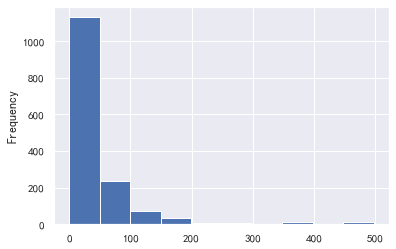

In [48]:
ms_01.售价.plot(kind="hist")

查看不同产品的预估销售额分布：

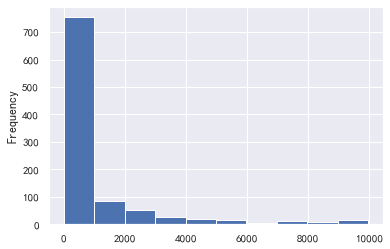

In [49]:
ms_01=ms[["宝贝ID","销量（人数）","售价","预估销售额"]]

ms_01.groupby("宝贝ID")["预估销售额"].sum()[ms_01.groupby("宝贝ID")["预估销售额"].sum()<10000].plot(kind="hist")

- 如果产品设计和投放不合理，可能会无法回收研发成本

哪个价格区间的产品是最受欢迎的（销量最大）？

In [50]:
ms_01.head()

,宝贝ID,销量（人数）,售价,预估销售额
0,566054780243,9976,26.80,267356.80
1,566054780243,9976,26.80,267356.80
2,572115448996,9945,9.90,98455.50
3,39868408322,99,29.90,2960.10
4,520282897220,99,39.90,3950.10


对价格进行分箱：

In [51]:
bins=[0,50,100,200,300,500]

ms_01["价格区间1"]=pd.cut(ms_01.售价,bins=bins)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
ms_01.head()

,宝贝ID,销量（人数）,售价,预估销售额,价格区间1
0,566054780243,9976,26.80,267356.80,"(0, 50]"
1,566054780243,9976,26.80,267356.80,"(0, 50]"
2,572115448996,9945,9.90,98455.50,"(0, 50]"
3,39868408322,99,29.90,2960.10,"(0, 50]"
4,520282897220,99,39.90,3950.10,"(0, 50]"


哪个价格区间销售量最大？

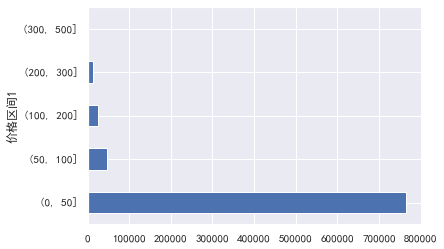

In [53]:
ms_01.groupby("价格区间1")["销量（人数）"].sum().plot(kind="barh")

- 价格区间在0-50之间最受欢迎，和其他价格区间的销量差距明显
- 进一步查看，0-50价格区间之间，哪个小价格区间最受欢迎？价格越低越受欢迎吗？

In [54]:
ms_02=ms_01[ms_01.售价<=50]
ms_02.head()

,宝贝ID,销量（人数）,售价,预估销售额,价格区间1
0,566054780243,9976,26.80,267356.80,"(0, 50]"
1,566054780243,9976,26.80,267356.80,"(0, 50]"
2,572115448996,9945,9.90,98455.50,"(0, 50]"
3,39868408322,99,29.90,2960.10,"(0, 50]"
4,520282897220,99,39.90,3950.10,"(0, 50]"


In [55]:
bins=[0,5,10,20,25,30,35,40,50]
ms_02["价格区间2"]=pd.cut(ms_02.售价,bins=bins)
ms_02.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,宝贝ID,销量（人数）,售价,预估销售额,价格区间1,价格区间2
0,566054780243,9976,26.80,267356.80,"(0, 50]","(25, 30]"
1,566054780243,9976,26.80,267356.80,"(0, 50]","(25, 30]"
2,572115448996,9945,9.90,98455.50,"(0, 50]","(5, 10]"
3,39868408322,99,29.90,2960.10,"(0, 50]","(25, 30]"
4,520282897220,99,39.90,3950.10,"(0, 50]","(35, 40]"


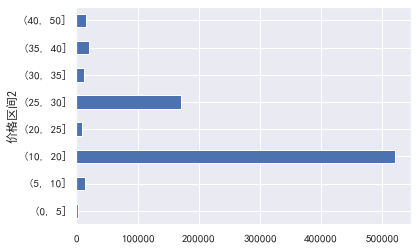

In [56]:
ms_02.groupby("价格区间2")["销量（人数）"].sum().plot(kind="barh")

- 灭鼠产品中10-20最受欢迎
- 其次是25-30
- 流量产品设计出了价格以外，还需要考虑流量大小、转化率，综合考虑最终的销售总额能否覆盖研发成本、销售成本、运营成本等。

## 微观市场的竞争分析

### 销售分析

#### 拜耳销售分析

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   序号      15 non-null     int64  
 1   店铺名称    15 non-null     object 
 2   商品名称    15 non-null     object 
 3   商品ID    15 non-null     int64  
 4   主图链接    15 non-null     object 
 5   商品链接    15 non-null     object 
 6   商品原价    15 non-null     float64
 7   商品售价    15 non-null     float64
 8   30天销售量  15 non-null     int64  
 9   总销量     15 non-null     int64  
 10  类目      15 non-null     object 
 11  物理形态    11 non-null     object 
 12  型号      15 non-null     object 
 13  净含量     13 non-null     object 
 14  使用对象    15 non-null     object 
 15  销售额     15 non-null     float64
dtypes: float64(3), int64(4), object(9)
memory usage: 2.0+ KB


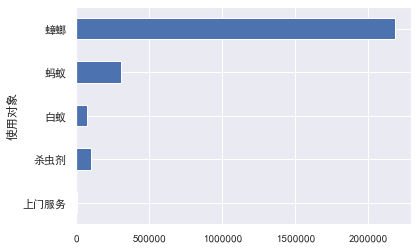

In [57]:
baier_01=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\拜耳店铺数据\拜耳近30天销售数据.xlsx")
kelin_01=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\竞争数据\商品销售数据\科凌虫控旗舰店近30天销售数据.xlsx")
ansu_01=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\竞争数据\商品销售数据\安速家居近30天销售数据.xlsx")

baier_01.info()

# 参考拜耳不同类型产品的销量和销售额

# baier_01[["商品ID","商品售价","30天销售量","使用对象"]]

# 不同使用对象分类的产品数量：

baier_01.groupby("使用对象")["商品ID"].count()

baier_01.groupby("使用对象")["销售额"].sum().plot(kind="barh")

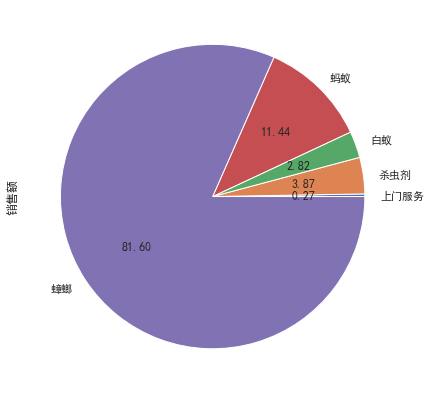

In [58]:
baier_01.groupby("使用对象")["销售额"].sum().plot(kind="pie",autopct="%.2f",figsize=(7,7))

- 拜耳的主营业务产品是灭蟑，其次是灭蚁、杀虫

#### 科凌销售分析

In [59]:
kelin_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   序号      27 non-null     int64  
 1   店铺名称    27 non-null     object 
 2   商品名称    27 non-null     object 
 3   商品ID    27 non-null     int64  
 4   主图链接    27 non-null     object 
 5   商品链接    27 non-null     object 
 6   商品原价    27 non-null     float64
 7   商品售价    27 non-null     float64
 8   30天销售量  27 non-null     int64  
 9   总销量     27 non-null     int64  
 10  类目      27 non-null     object 
 11  适用对象    27 non-null     object 
 12  30天销售额  27 non-null     float64
dtypes: float64(3), int64(4), object(6)
memory usage: 2.9+ KB


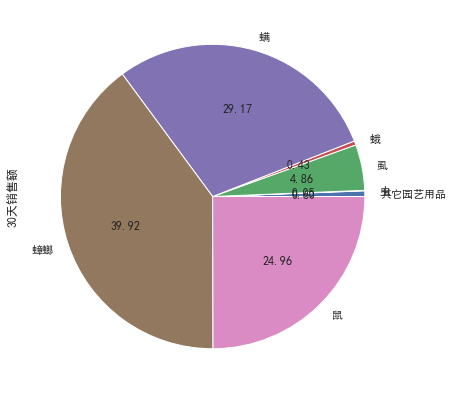

In [60]:
kelin_01.groupby("适用对象")["30天销售额"].sum().plot(kind="pie",autopct="%.2f",figsize=(7,7))

- 科凌产品的产品矩阵覆盖了二级市场之下的几乎所有三级类目，灭鼠、灭蟑、除螨的产品占科凌销售额90%以上。
- 科凌最大的业务收入来源于灭蟑，于拜耳主营业务构成竞争关系

#### 安速销售分析

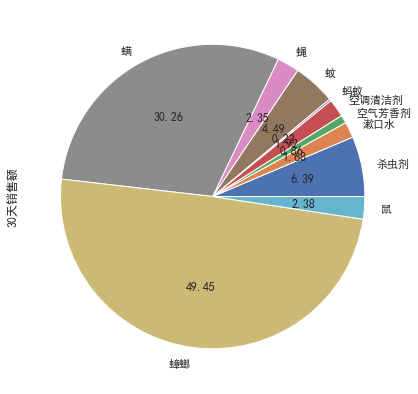

In [61]:
ansu_01.groupby("适用对象")["30天销售额"].sum().plot(kind="pie",autopct="%.2f",figsize=(7,7))

- 安速主营业务依然是灭蟑，其次是除螨，以及其他杀虫产品，包括与拜耳构成竞争的灭蚁和杀虫剂
- 而且与拜耳的灭蟑产品构成主要业务冲突

In [62]:
ansu_01.groupby("适用对象")["30天销售额"].sum().sort_values()

适用对象
蚂蚁        1176.60
空气芳香剂     4668.60
漱口水       9137.30
空调清洁剂    10420.90
蝇        12772.00
鼠        12936.60
蚊        24388.60
杀虫剂      34687.50
螨       164381.30
蟑螂      268585.30
Name: 30天销售额, dtype: float64

In [63]:
baier_01.groupby("使用对象")["销售额"].sum().sort_values()

使用对象
上门服务      7326.00
白蚁       75336.20
杀虫剂     103460.70
蚂蚁      305820.00
蟑螂     2181372.30
Name: 销售额, dtype: float64

### 竞品结构分析

In [64]:
baier_02=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\拜耳店铺数据\拜耳全店商品交易数据.xlsx")
kelin_02=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\竞争数据\商品交易数据\科凌虫控全店商品交易数据.xlsx")
ansu_02=pd.read_excel(r"E:\课件目录\拜耳电商案例课件资料\电商案例数据\竞争数据\商品交易数据\安速全店商品交易数据.xlsx")

#### 拜耳商品分析

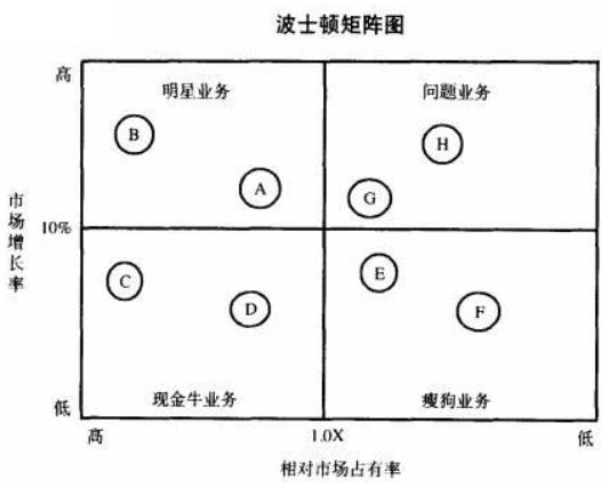

In [65]:
baier_02.head()

,品牌,时间,商品,行业排名,交易指数,交易增长幅度,支付转化指数,操作,交易金额
0,拜耳,2018-07-01,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,1,583483,0.04,1500,趋势分析,9354158.37
1,拜耳,2018-07-01,进口蟑螂药一窝端德国拜耳拜灭士强力杀蟑胶饵蟑螂屋克星家用全窝,6,278542,0.13,1194,趋势分析,2470202.91
2,拜耳,2018-07-01,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁杀虫剂家用室内全窝端,11,212329,0.51,1328,趋势分析,1518114.06
3,拜耳,2018-07-01,进口蟑螂药德国拜耳拜灭士灭杀蟑胶饵剂粉屋克星全窝端12g家用,44,107697,-0.20,1117,趋势分析,451897.06
4,拜耳,2018-07-01,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,45,105901,-0.21,936,趋势分析,438583.74


In [66]:
bair_03=baier_02[["商品","交易增长幅度","交易金额"]]

- 明星产品：交易增长率高，且带来大量现金流的产品
- 现金牛产品：交易增长率低，且带来大量现金流的产品
- 潜力产品：交易增长率高，但没带来太多现金流的产品
    - 交易增长率高：高于平均交易增长率
    - 高现金流：高于所有产品现金流平均值

In [67]:
bair_03.head()

,商品,交易增长幅度,交易金额
0,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,0.04,9354158.37
1,进口蟑螂药一窝端德国拜耳拜灭士强力杀蟑胶饵蟑螂屋克星家用全窝,0.13,2470202.91
2,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁杀虫剂家用室内全窝端,0.51,1518114.06
3,进口蟑螂药德国拜耳拜灭士灭杀蟑胶饵剂粉屋克星全窝端12g家用,-0.20,451897.06
4,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.21,438583.74


首先求出每个商品的平均增长幅度，以及每个商品的交易金额均值：

In [68]:
bair_04=bair_03.groupby("商品").agg({"交易增长幅度":np.mean,"交易金额":np.sum})
bair_04.head()

,交易增长幅度,交易金额
商品,,
17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.25,42340.55
德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.12,197377.17
德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.22,1394780.59
德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.28,26742.75
德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.44,28969.28


In [69]:
avg_incr=bair_04.交易增长幅度.mean()
avg_amou=bair_04.交易金额.mean()

##### 明星产品

In [70]:
bair_04[(bair_04.交易增长幅度>=avg_incr)&(bair_04.交易金额>=avg_amou)]

,交易增长幅度,交易金额
商品,,



##### 现金牛产品

In [71]:
bair_04[(bair_04.交易增长幅度<avg_incr)&(bair_04.交易金额>=avg_amou)]

,交易增长幅度,交易金额
商品,,
德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,-0.12,40103850.97
德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁杀虫剂家用室内全窝端,-0.06,6130488.42
蟑螂药一窝端德国拜耳拜灭士除蟑灭杀蟑螂克星全窝端家用杀蟑胶,0.04,2976922.63
进口蟑螂药一窝端德国拜耳拜灭士强力杀蟑胶饵蟑螂屋克星家用全窝,-0.03,13617307.87
进口蟑螂药德国拜耳拜灭士灭杀蟑胶饵剂粉屋克星全窝端12g家用,0.07,3589799.54


##### 潜力产品

In [72]:
bair_04[(bair_04.交易增长幅度>=avg_incr)&(bair_04.交易金额<avg_amou)]

,交易增长幅度,交易金额
商品,,
德国拜耳拜灭士蟑螂药一窝端进口全窝端家用灭除杀蟑胶饵5g包邮,29.26,236386.32
电子猫超声波驱鼠器家用大功率灭鼠防鼠赶老鼠夹药捕鼠干扰粘鼠板,1030.00,41046.03
进口蟑螂药一窝端德国拜耳拜灭士杀蟑胶饵诱防蟑螂屋全窝端5+12g,31.22,67043.14


备注：电子猫由于突然上架和下架导致交易增长幅度数据异常

##### 潜力产品

In [73]:
bair_04[(bair_04.交易增长幅度<avg_incr)&(bair_04.交易金额<avg_amou)]

,交易增长幅度,交易金额
商品,,
17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.25,42340.55
德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.12,197377.17
德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.22,1394780.59
德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.28,26742.75
德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.44,28969.28
德国拜耳拜灭士5g+拜灭易12g进口杀蟑螂蚂蚁药蟑螂克星家用全窝端,0.05,251225.58
德国拜耳拜灭士5g+除敌5ml*4支进口蟑螂药家用全窝端杀蟑螂套装,1.31,1484952.41
德国拜耳拜灭易12g+除敌5ml*4支 进口蚂蚁药全窝端家用杀虫剂组合,0.45,89566.01
德国拜耳拜灭易灭蚁饵剂粉除杀防蚂蚁药杀虫剂全窝端家用室内花园,-0.03,1520126.15


#### 科凌商品分析

##### 明星产品

In [74]:
kelin_02.head()

,日期,商品,行业排名,交易指数,交易增长幅度,支付转化指数,操作,交易金额
0,2018-07-01,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,2,466881,0.45,1850,趋势分析,6256693.23
1,2018-07-01,蟑螂屋捕捉器除灭蟑螂药一窝端神器纸盒子胶饵杀小蟑螂贴厨房家用,14,204545,0.19,1577,趋势分析,1419883.88
2,2018-07-01,跳蚤杀虫剂家用厕所卫生间下水道除虫灭小飞虫蛾蚋蟑螂臭虫药室内,42,110415,0.07,1197,趋势分析,472380.75
3,2018-07-01,杀蟑螂药一窝端蟑螂药粉家用捕捉器屋厨贴无毒灭蟑螂粉除小强克星,46,101833,-0.37,1698,趋势分析,409084.82
4,2018-07-01,老鼠贴超强力粘鼠板灭鼠神器捕鼠魔毯yao颗粒老鼠胶家用药捕鼠器,56,93036,0.03,1149,趋势分析,348435.13


In [75]:
kelin_03=kelin_02[["商品","交易增长幅度","交易金额"]]

In [76]:
kelin_04=kelin_03.groupby("商品").agg({"交易增长幅度":np.mean,"交易金额":np.sum})

In [77]:

avg_incr=kelin_04.交易增长幅度.mean()
avg_amou=kelin_04.交易金额.mean()


In [78]:
kelin_04[(kelin_04.交易增长幅度>=avg_incr)&(kelin_04.交易金额>=avg_amou)]

,交易增长幅度,交易金额
商品,,


##### 现金牛产品

In [79]:
kelin_04[(kelin_04.交易增长幅度<avg_incr)&(kelin_04.交易金额>=avg_amou)]

,交易增长幅度,交易金额
商品,,
老鼠贴超强力粘鼠板灭鼠神器捕鼠魔毯yao颗粒老鼠胶家用药捕鼠器,0.09,2074886.77
蟑螂屋捕捉器除灭蟑螂药一窝端神器纸盒子胶饵杀小蟑螂贴厨房家用,-0.01,7464346.74
蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,-0.10,21966057.02
除螨虫家用喷剂床上祛防螨去螨虫神器喷雾剂包贴杀虫剂免洗非杀菌,0.81,2270518.54


潜力产品

In [80]:
kelin_04[(kelin_04.交易增长幅度>=avg_incr)&(kelin_04.交易金额<avg_amou)]

,交易增长幅度,交易金额
商品,,
天然除螨虫包喷雾剂中草药祛防杀去螨虫垫贴床上用品家用驱虫神器,407.98,290170.09


##### 瘦狗产品

In [81]:
kelin_04[(kelin_04.交易增长幅度<avg_incr)&(kelin_04.交易金额<avg_amou)]

,交易增长幅度,交易金额
商品,,
4 只装驱老鼠夹捕鼠器家用灭鼠神器抓杀扑老鼠夹子捉老鼠笼全自动,0.05,289907.35
去儿童头虱除阴虱净喷剂百部酊虱卵用虱子药成人一扫光净虱灵喷雾,0.67,1112790.54
抓老鼠夹子捕鼠器笼家用连续全自动逮捉老鼠笼超强扑鼠笼灭鼠神器,0.07,51645.49
抓老鼠贴强力粘鼠板胶药沾灭鼠器捕鼠神器克星家用正品20张一窝端,4.22,119948.74
杀蟑螂药一窝端蟑螂药粉家用捕捉器屋厨贴无毒灭蟑螂粉除小强克星,-0.19,1408637.81
汽车家用驱鼠剂防老鼠克星喷雾剂耗子发动机舱包防鼠灭鼠药驱鼠器,0.14,25665.98
灭小飞蛾杀虫剂粘捕器除衣蛾黏杀蛾子蛾蠓贴米面蛾米蛾诱捕器家用,-0.01,175024.36
灭蟑螂药烟剂杀蜘蛛驱烟雾弹神器克星家用全窝端除蚂蚁蜈蚣烟熏片,-0.04,424747.11
灭蟑螂药粉笔神器除跳蚤粉全窝端家用无毒厨房杀蚂蚁神奇药笔克星,-0.25,324119.15


- 科凌的明星产品和拜耳一样，不明显
- 但是科凌的现金流产品类型较多


#### 安速商品分析

In [82]:
ansu_03=ansu_02[["商品","交易增长幅度","交易金额"]]

ansu_04=ansu_03.groupby("商品").agg({"交易增长幅度":np.mean,"交易金额":np.sum})

avg_incr=ansu_04.交易增长幅度.mean()
avg_amou=ansu_04.交易金额.mean()

ansu_04[(ansu_04.交易增长幅度>=avg_incr)&(ansu_04.交易金额>=avg_amou)]

,交易增长幅度,交易金额
商品,,


现金流产品

In [83]:
ansu_04[(ansu_04.交易增长幅度<avg_incr)&(ansu_04.交易金额>=avg_amou)]

,交易增长幅度,交易金额
商品,,
✅【10枚装】日本进口安速小强恢恢蟑螂屋捕捉器杀药贴家用全窝端,-0.16,812113.82
日本安速小强恢恢蟑螂屋家用杀蟑胶饵小蟑螂药无毒蟑螂克星全窝端,-0.25,919683.22
日本安速小强恢恢蟑螂屋纸盒子捕捉器药灭杀强力家用贴克星全窝端,0.01,13294975.97
日本安速小黑帽蟑螂屋家用强力灭蟑螂药环保无毒无味除小强包邮,0.07,1083611.82
日本安速红阿斯烟雾杀虫剂灭跳蚤药烟弹家用神器螨虫克星送蟑螂屋,0.10,762628.32
日本安速蟑螂小屋灭除杀蟑螂药一窝端神器捕捉器家用克星小强恢恢,0.44,881587.79
日本进口安速小强恢恢杀蟑灭蟑螂屋10枚捕捉器不含蟑螂药,-0.00,2354769.41
日本进口安速小强恢恢灭蟑螂屋药无毒捕捉器克星家用强力清全窝端,-0.11,3685204.19
日本进口安速红阿斯杀虫烟雾剂弹烟熏灭跳蚤蟑螂克星家用全窝端,-0.12,622279.57


潜力产品

In [84]:
ansu_04[(ansu_04.交易增长幅度>=avg_incr)&(ansu_04.交易金额<avg_amou)]

,交易增长幅度,交易金额
商品,,
冲销量日本安速小黑帽蟑螂屋蟑螂药家用强力灭蟑清安全无毒小强,42.01,32034.34
日本安速ARS地球制药earth小飞虫恢恢果蝇诱捕器单只装 0315,4.36,40441.40
日本安速杀蟑气雾剂精纯无味型2瓶 灭蟑螂药杀虫剂家用潮虫百虫灵,3.45,52292.37
日本安速蚂蚁药灭蚂蚁清驱除杀红蚂蚁小黄蚂蚁全窝端家用室内花园,21.46,444230.43
日本安速除螨虫喷雾剂床上免洗去螨虫神器喷剂家用非杀菌送除螨包,6.65,41991.71
日本进口安速天然除螨喷雾剂350ml床上免洗家用正品螨虫非除杀菌,3.86,304915.11


- 安速的潜力产品和现金流产品较多，此类产品的类目最丰富